# Exploring Relationships

### Contents:
1. Import libraries
2. Import data
3. Exploring relationships
 - Correlation Heatmap
 - Scatterplot
 - Pair Plot
 - Categorical Plot
4. Answering research questions with data visualizations

## 1. Import Libraries

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import datetime as dt
import os

## 2. Import data

In [2]:
# Create a string of the path for the main project folder
path = r'C:\Users\Ryan\Documents\08-31-2023 Citi Bike Analysis'

In [3]:
# Import the “201903-citibike-tripdata-cleaned.pkl” data set using the os library
df_citibike = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', '201903-citibike-tripdata-cleaned.pkl'))

In [4]:
# Check the output
df_citibike.head()

,user_type,gender,age,age_group,trip_duration,start_day_name,start_day,start_hour,start_station,start_latitude,start_longitude,end_station,end_latitude,end_longitude
0,Subscriber,Male,30,26-35,24.379999,Friday,1,0,Fulton St & Broadway,40.711067,-74.009445,Greenwich St & W Houston St,40.728848,-74.008591
1,Subscriber,Male,39,36-45,4.750000,Friday,1,0,E 4 St & 2 Ave,40.726280,-73.989777,E 2 St & Avenue C,40.720875,-73.980858
2,Subscriber,Male,32,26-35,11.430000,Friday,1,0,E 33 St & 5 Ave,40.747658,-73.984909,6 Ave & Spring St,40.725254,-74.004120
3,Subscriber,Female,32,26-35,7.370000,Friday,1,0,6 Ave & Spring St,40.725254,-74.004120,Bayard St & Baxter St,40.716022,-73.999741
4,Subscriber,Male,28,26-35,48.549999,Friday,1,0,W 31 St & 7 Ave,40.749157,-73.991600,W 16 St & The High Line,40.743351,-74.006821


In [5]:
# Check the dimensions
df_citibike.shape

(1255492, 14)

In [6]:
# Check the data types
df_citibike.dtypes

user_type           object
gender              object
age                  uint8
age_group           object
trip_duration      float32
start_day_name      object
start_day            uint8
start_hour           uint8
start_station       object
start_latitude     float32
start_longitude    float32
end_station         object
end_latitude       float32
end_longitude      float32
dtype: object

## 3. Exploring Relationships

#### Correlation Heatmap

Text(0.5, 1.0, 'Exploring Correlation between Variables')

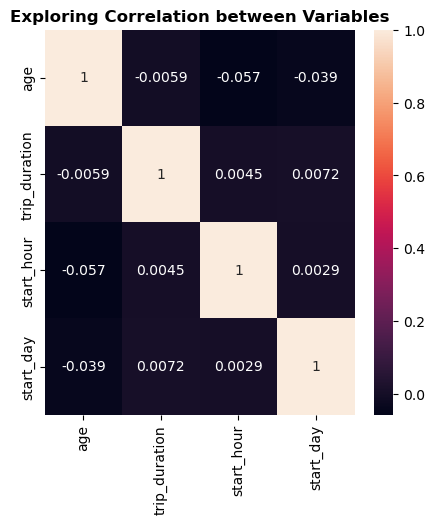

In [7]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(df_citibike[['age', 'trip_duration', 'start_hour', 'start_day']].corr(), annot=True)
plt.title('Exploring Correlation between Variables', weight='bold')

- Age and trip duration have a correlation of -0.0059, which is very close to 0. Therefore, there is no relationship between age and trip duration.
- Age and start hour have a correlation of -0.057, which is very close to 0. Therefore, there is no relationship between age and start hour.
- Age and start day have a correlation of -0.039, which is very close to 0. Therefore, there is no relationship between age and start day.
- Trip duration and and start hour have a correlation of 0.0045, which is very close to 0. Therefore, there is no relationship between trip duration and start hour.
- Trip duration and start day have a correlation of 0.0072, which is very close to 0. Therefore, there is no relationship between trip duration and start day.
- Start hour and start day have a correlation of 0.0029, which is very close to 0. Therefore, there is no relationship between start hour and start day.

#### Scatterplot

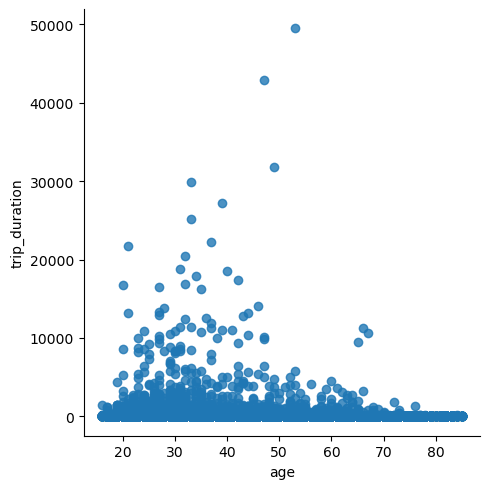

In [8]:
sns.lmplot(x = 'age', y = 'trip_duration', data = df_citibike)

- The scatterplot reveals a nonlinear relationship between age and trip duration.
 - Trip durations tend to be longer for users under the age of 50 and shorter for users over the age of 50.
- There is a great degree of variability around the trend line, which cannot even be seen because it is covered by all the points at the bottom.

#### Pair Plots

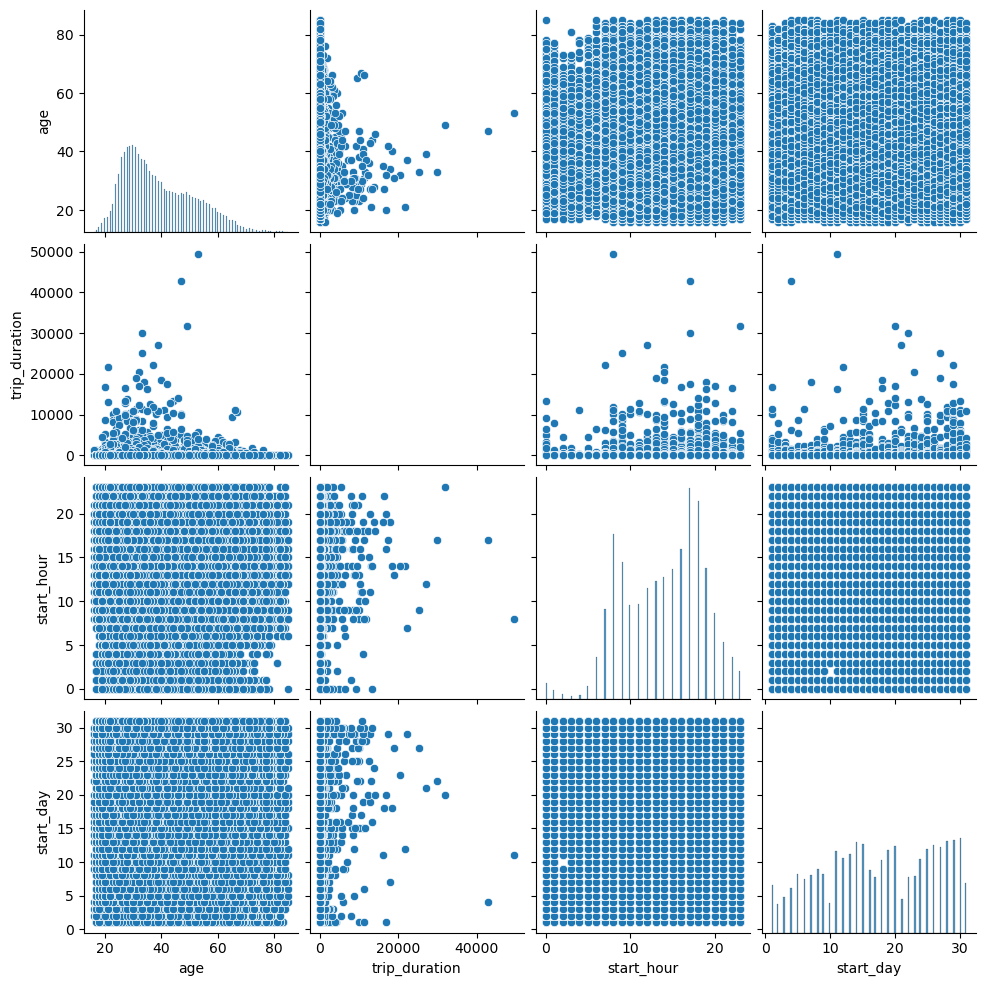

In [9]:
sns.pairplot(df_citibike[['age', 'trip_duration', 'start_hour', 'start_day']])

**Variables to be explored further:**
- None, because no relationship exists between any of the variables.

**Comments regarding the distributions:**
- The distribution of the user's age reveals that bikes are rented more frequently by younger users and less frequently by older users.
- The distribution of trip duration cannot be seen; will have to make a histogram to make up for that.
- The distribution of the start hour shows majority of rentals occur between 7:00am and 8:00pm, with the most frequent rentals occuring at 8:00am and 5:00pm, times when people go to work and leave from work.
- The distribution of the start day reveals bike rentals were increasing during the first half of March, then bike rentals have stayed nearly the same afterwards with some dips in rentals.

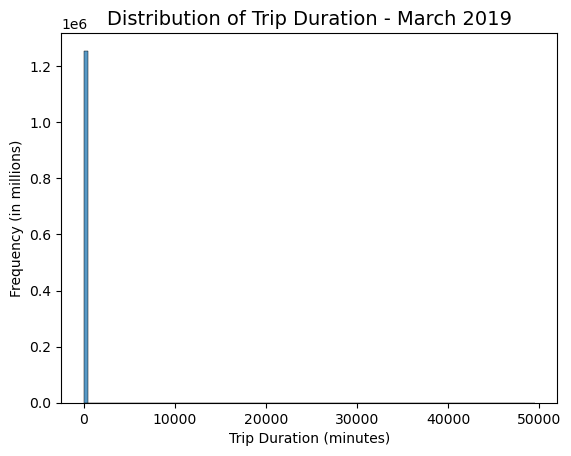

In [10]:
# Create a histogram to visualize the distribution of the trip duration variable
sns.histplot(df_citibike['trip_duration'], bins = 100)
plt.title('Distribution of Trip Duration - March 2019', fontsize=14)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency (in millions)')
plt.tick_params(labelsize=10)

The histogram of trip duration reveals there is a much higher frequency of short trip durations and a very low frequency of long trip durations.

#### Categorical Plots

Text(43.806335358796304, 0.5, 'Trip Duration (minutes)')

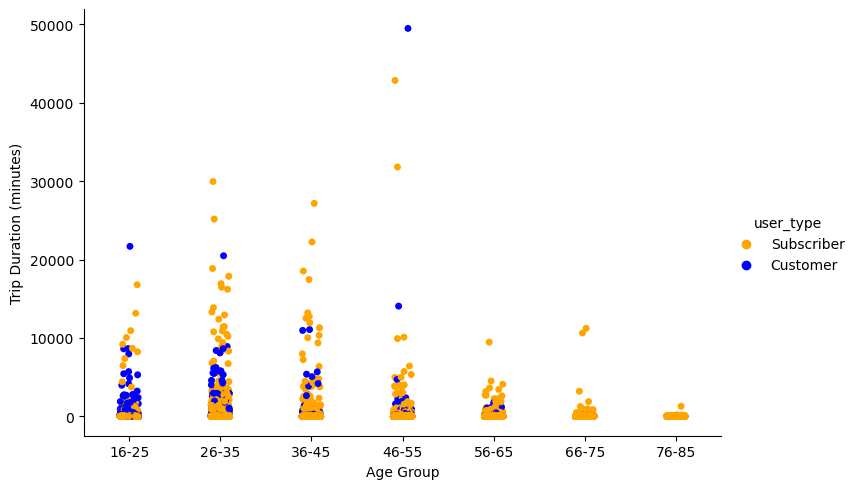

In [11]:
# Create a categorical plot
sns.catplot(data=df_citibike, x='age_group', y='trip_duration', hue='user_type', height=5, aspect=1.5, palette=sns.color_palette(['orange', 'blue']), order=['16-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85'])
plt.xlabel('Age Group')
plt.ylabel('Trip Duration (minutes)')

**Conclusion:**
- The catplot reveals that Citi Bike users 56 years or older tend to have shorter trip duration, and Citi Bike users under 56 years tend to have longer trip durations.
- It also appears that most of the users that are 56 years or older are mostly subscribers, but this would better be confirmed with a bar chart.

Text(41.71123387896826, 0.5, 'Trip Duration (minutes)')

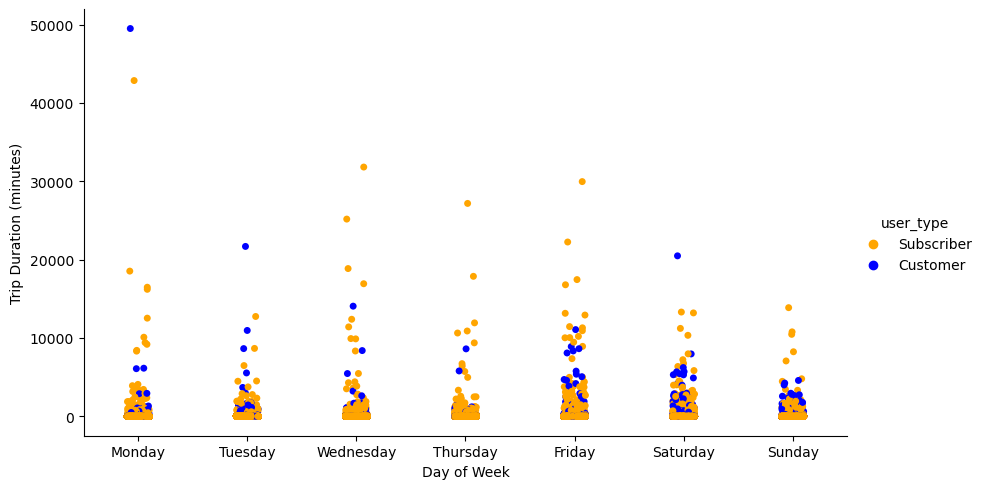

In [12]:
# Create a categorical plot
sns.catplot(data=df_citibike, x='start_day_name', y='trip_duration', hue='user_type', height=5, aspect=1.75, palette=sns.color_palette(['orange', 'blue']), order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration (minutes)')

**Conclusion:**
- The catplot reveals that Sunday has the shortest trip durations compared to the rest of the days of the week.

Text(51.13919053819444, 0.5, 'Trip Duration (minutes)')

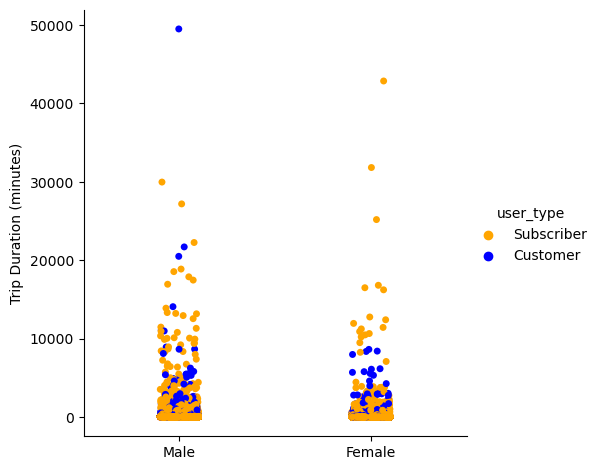

In [13]:
# Create a categorical plot
sns.catplot(data=df_citibike, x='gender', y='trip_duration', hue='user_type', palette=sns.color_palette(['orange', 'blue']))
plt.xlabel('')
plt.ylabel('Trip Duration (minutes)')

**Conclusion:**
- The catplot reveals that Males take longer trip durations more frequently than females.

## 4. Answering research questions with data visualizations

**Questions I wanted to explore:**
- What day and time of hour do Citi Bike users rent the least/most frequently?
- Which age group rents bikes least/most frequently? How does it vary by gender?
- What are the most popular pick-up locations across the city for Citi Bike users?
- What are the most popular drop-off locations across the city for Citi Bike users?
- How does the average trip duration vary across age group? User type? Days of the week? Gender?
- How does bike rental vary across user type/age group/gender on different days of the week?
- Does user’s age impact the bike trip duration?

**Questions that can be answered from exploration done so far:**
- Does user's age impact the bike trip duration? 
 - No, because there is no relationship between age and trip duration. However, Citi bike uers under 50 years appear to have longer trip durations compared to users over 50 years.

#### What day and time of hour do Citi Bike users rent the least/most frequently?

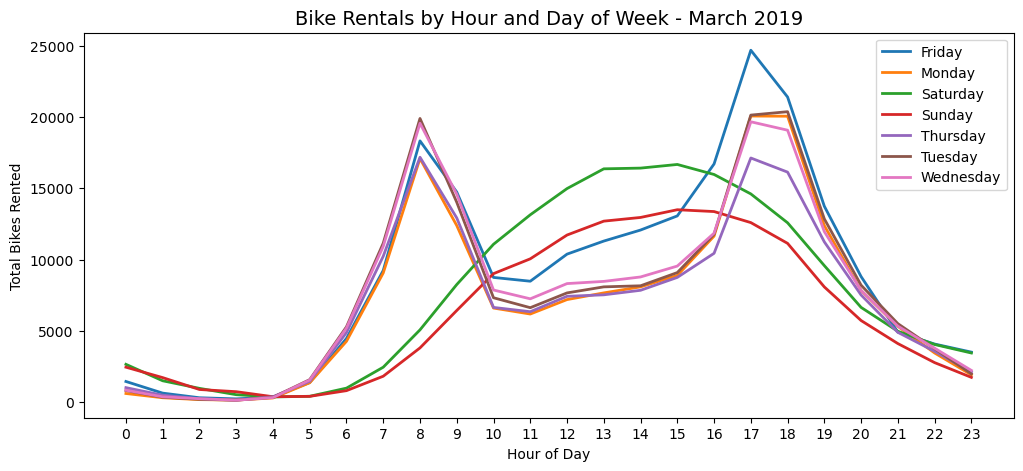

In [14]:
# Plotting bike rental frequency by hour of day
df_citibike.pivot_table(values='trip_duration', index='start_hour', columns='start_day_name', aggfunc='count').plot(figsize=(12,5), linewidth=2)
plt.title('Bike Rentals by Hour and Day of Week - March 2019', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Total Bikes Rented')
plt.xticks(np.arange(0,24))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)

**Conclusion:**
- Bike rental frequency for the weekdays peaks at two times: 8am and 5pm, a time when people leave to and from work.
- Bike rental frequency for the weekdays is the lowest between 2am and 3am.
- Bike rental frequency for the weekends peak at 3pm.
- Bike rental frequency for the weekends is the lowest between 4am and 5am.

#### Which age group rents bikes least/most frequently? How does it vary by gender?

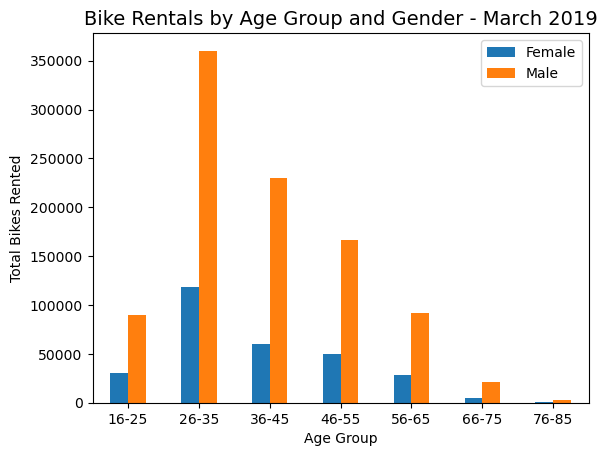

In [15]:
# Plotting bike rental frequency by age group and gender
df_citibike.pivot_table(values='trip_duration', index='age_group', columns='gender', aggfunc='count').plot.bar(stacked=False, rot=0)
plt.title('Bike Rentals by Age Group and Gender - March 2019', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Total Bikes Rented')
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)

**Conclusion:**
- Male and female Citi Bike users age 26 to 35 years rent bikes most frequently. 
- Male and female Citi Bike users age 76 to 85 years rent bikes least frequently.

#### What are the most popular pick-up locations across the city for Citi Bike users?

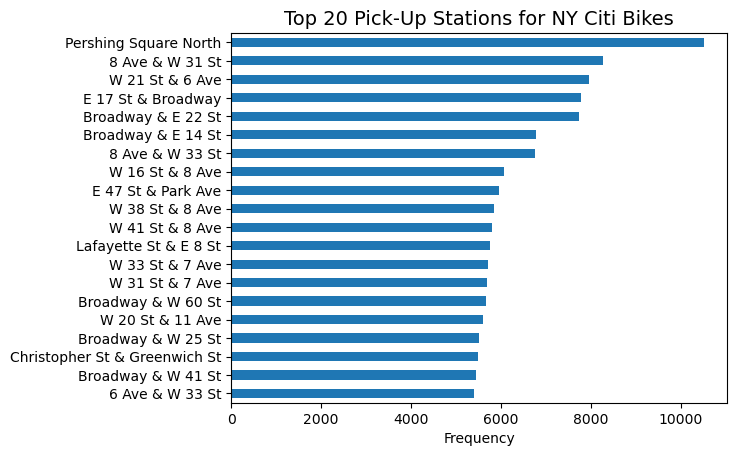

In [16]:
# Make a bar graph of the top 20 pick-up (starting) locations
df_citibike['start_station'].value_counts().sort_values(ascending=True).tail(20).plot.barh()
plt.title('Top 20 Pick-Up Stations for NY Citi Bikes', fontsize=14)
plt.xlabel('Frequency')
plt.tick_params(labelsize=10)

#### What are the most popular drop-off locations across the city for Citi Bike users?

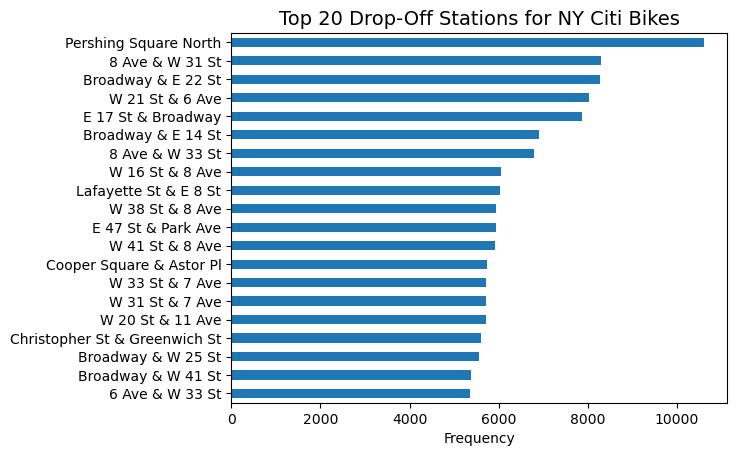

In [17]:
# Make a bar graph of the top 20 drop-off (ending) locations
df_citibike['end_station'].value_counts().sort_values(ascending=True).tail(20).plot.barh()
plt.title('Top 20 Drop-Off Stations for NY Citi Bikes', fontsize=14)
plt.xlabel('Frequency')
plt.tick_params(labelsize=10)

#### How does the average trip duration vary across age group and user type?

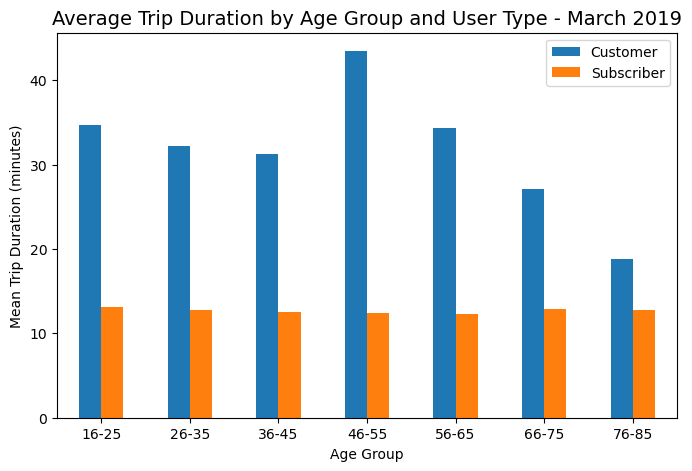

In [18]:
# Make a bar graph of the mean trip duration by age group and user type
df_citibike.pivot_table(values='trip_duration', index='age_group', columns='user_type', aggfunc='mean').plot.bar(stacked=False, figsize=(8,5), rot=0)
plt.title('Average Trip Duration by Age Group and User Type - March 2019', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Mean Trip Duration (minutes)')
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)

**Conclusion:**
- Citi Bike customers have longer trip durations, on average, than Citi Bike subscribers.
- There is no difference in the average trip duration among all age groups of Citi Bike subscribers.
- There is a difference in the average trip duration among the age groups for Citi Bike customers.

#### How does the average trip duration vary across age group and gender?

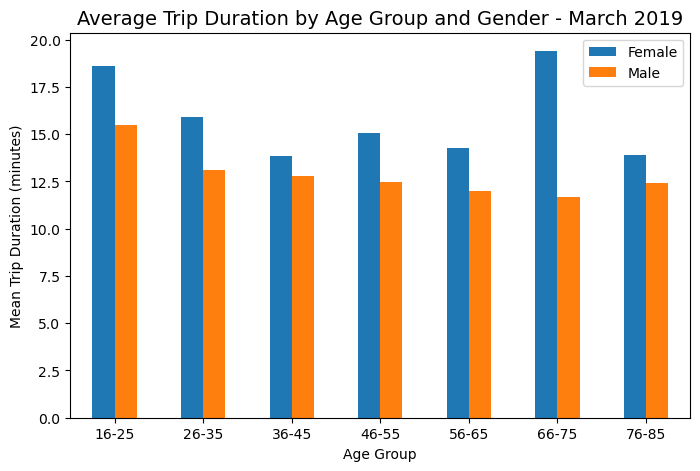

In [19]:
# Make a bar graph of the mean trip duration by age group and gender
df_citibike.pivot_table(values='trip_duration', index='age_group', columns='gender', aggfunc='mean').plot.bar(stacked=False, figsize=(8,5), rot=0)
plt.title('Average Trip Duration by Age Group and Gender - March 2019', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Mean Trip Duration (minutes)')
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)

**Conclusion:**
- Female Citi Bike users have longer trip durations, on average, than male Citi Bike users.
- Younger male Citi Bike users tend to have longer trip durations, on avearge, than older male Citi Bike users.
- Younger female Citi Bike users tend to have longer trip durations, on average, than older female Citi Bike users.

#### How does the average trip duration vary across days of the week and user type?

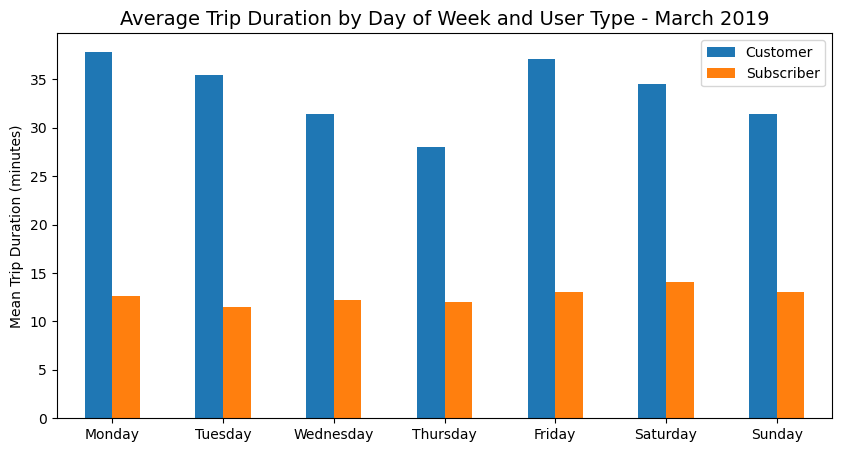

In [20]:
# Make a bar graph of the mean trip duration by day of week and user type
df_citibike.pivot_table(values='trip_duration', index='start_day_name', columns='user_type', aggfunc='mean').loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.bar(stacked=False, figsize=(10,5), rot=0)
plt.title('Average Trip Duration by Day of Week and User Type - March 2019', fontsize=14)
plt.xlabel('')
plt.ylabel('Mean Trip Duration (minutes)')
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)

**Conclusion:**
- Citi Bike customers have longer trip durations, on average, than Citi Bike subscribers.
- There is no difference in mean trip duration across the days of the week for Citi Bike subscribers.
- There is a difference in mean trip duration across the days of the week for Citi Bike customers.

#### How does the average trip duration vary across days of the week and gender?

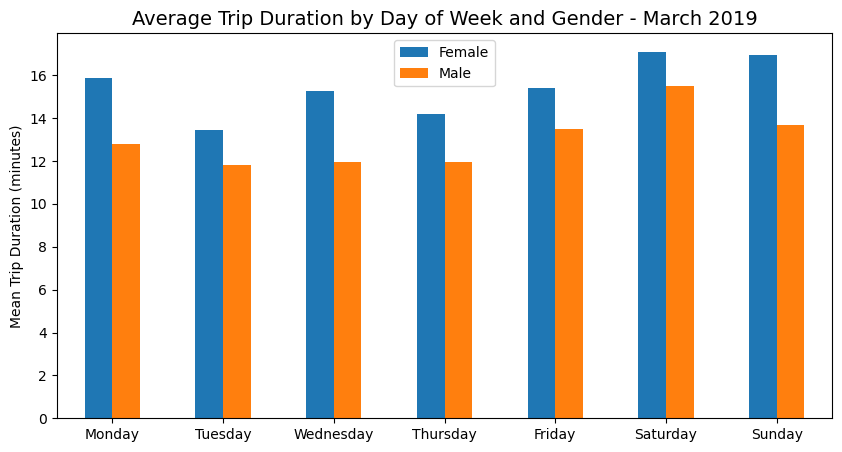

In [21]:
# Make a bar graph of the mean trip duration by day of week and gender
df_citibike.pivot_table(values='trip_duration', index='start_day_name', columns='gender', aggfunc='mean').loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.bar(stacked=False, figsize=(10,5), rot=0)
plt.title('Average Trip Duration by Day of Week and Gender - March 2019', fontsize=14)
plt.xlabel('')
plt.ylabel('Mean Trip Duration (minutes)')
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)

**Conclusion:**
- Female Citi Bike users have longer trip durations, on average, than male Citi Bike users.
- There is a difference in mean trip duration across the days of the week for male and female Citi Bike users; the weekends have longer trip durations, on average.

#### How does bike rental vary across user type on different days of the week?

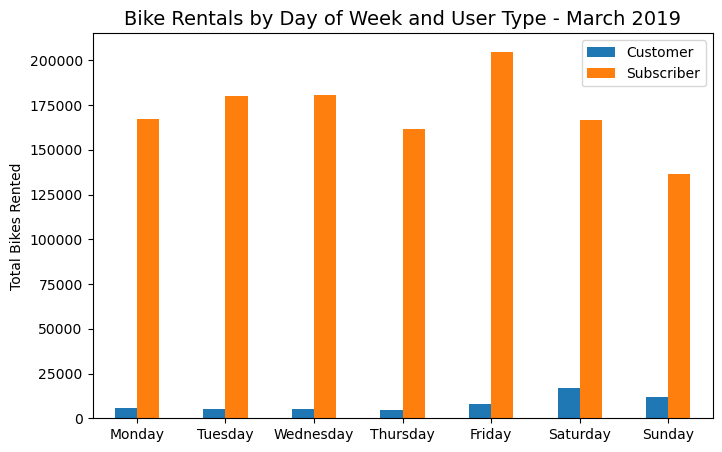

In [22]:
# Make a frequency bar graph of bike rentals by day of week and user type
df_citibike.pivot_table(values='trip_duration', index='start_day_name', columns='user_type', aggfunc='count').loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.bar(stacked=False, figsize=(8,5), rot=0)
plt.title('Bike Rentals by Day of Week and User Type - March 2019', fontsize=14)
plt.xlabel('')
plt.ylabel('Total Bikes Rented')
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)

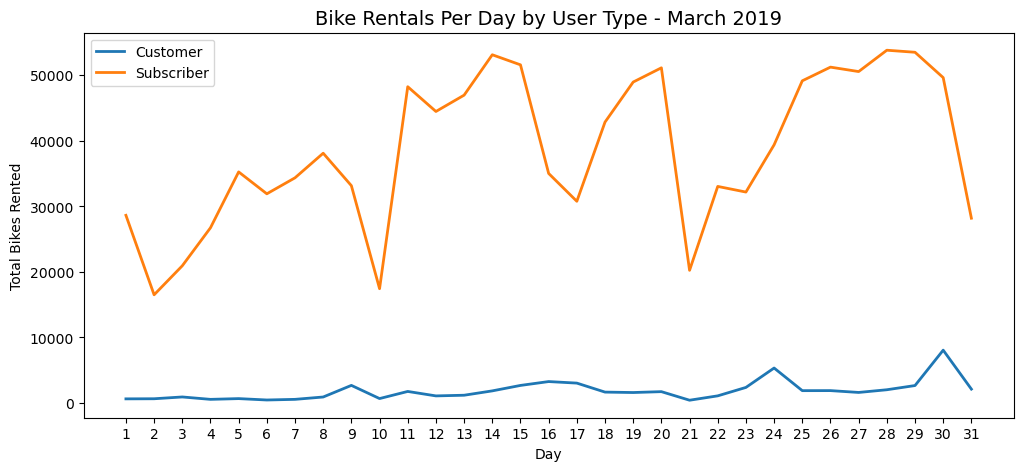

In [23]:
# Plot bike rentals per day by user type
df_citibike.pivot_table(values='trip_duration', index='start_day', columns='user_type', aggfunc='count').plot(figsize=(12,5), linewidth=2)
plt.title('Bike Rentals Per Day by User Type - March 2019', fontsize=14)
plt.xlabel('Day')
plt.ylabel('Total Bikes Rented')
plt.xticks(np.arange(1,32))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)

**Conclusion:**
- Citi Bike subscribers rent bikes more frequently than Citi Bike customers.
- Citi Bike subscribers rent bikes more frequently on the weekdays.
- Citi Bike customers rent bikes more frequently on the weekends.

#### How does bike rental vary across age group on different days of the week?

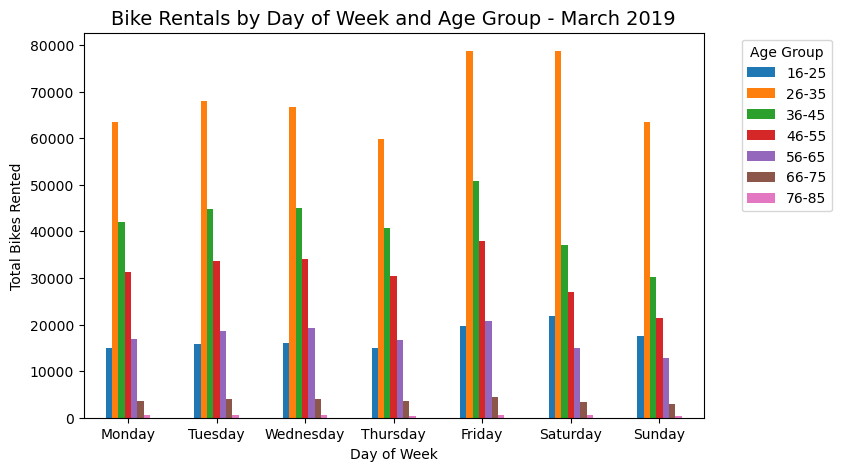

In [24]:
# Make a frequency bar graph of bike rentals by day of week and age group
df_citibike.pivot_table(values='trip_duration', index='start_day_name', columns='age_group', aggfunc='count').loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.bar(stacked=False, figsize=(8,5), rot=0)
plt.title('Bike Rentals by Day of Week and Age Group - March 2019', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Total Bikes Rented')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tick_params(labelsize=10)

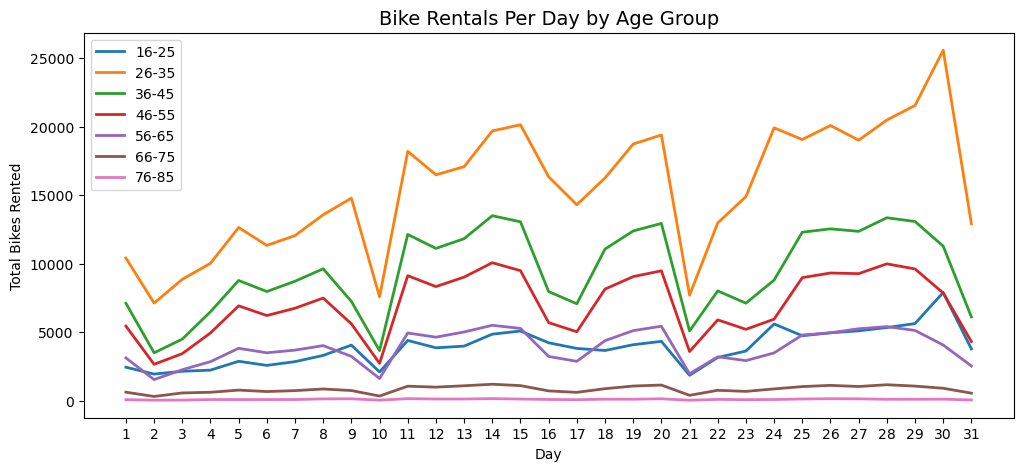

In [25]:
# Plot bike rentals per day by age group
df_citibike.pivot_table(values='trip_duration', index='start_day', columns='age_group', aggfunc='count').plot(figsize=(12,5), linewidth=2)
plt.title('Bike Rentals Per Day by Age Group', fontsize=14)
plt.xlabel('Day')
plt.ylabel('Total Bikes Rented')
plt.xticks(np.arange(1,32))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)

**Conclusion:**
- Citi Bike users age 26 to 35 years rent bikes the most frequently across all days of the week.
- Citi Bike users age 76 to 85 years rent bikes the least frequently across all days of the week.

#### How does bike rental vary across gender on different days of the week?

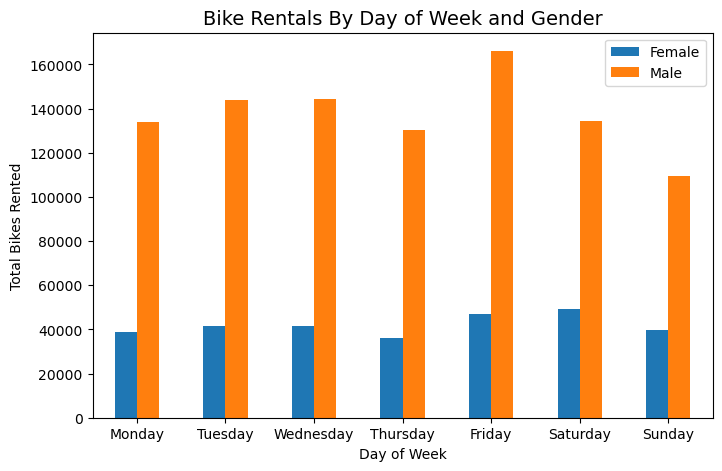

In [27]:
# Make a frequency bar graph of bike rentals by day of week and gender
df_citibike.pivot_table(values='trip_duration', index='start_day_name', columns='gender', aggfunc='count').loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot.bar(stacked=False, figsize=(8,5), rot=0)
plt.title('Bike Rentals By Day of Week and Gender', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Total Bikes Rented')
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)

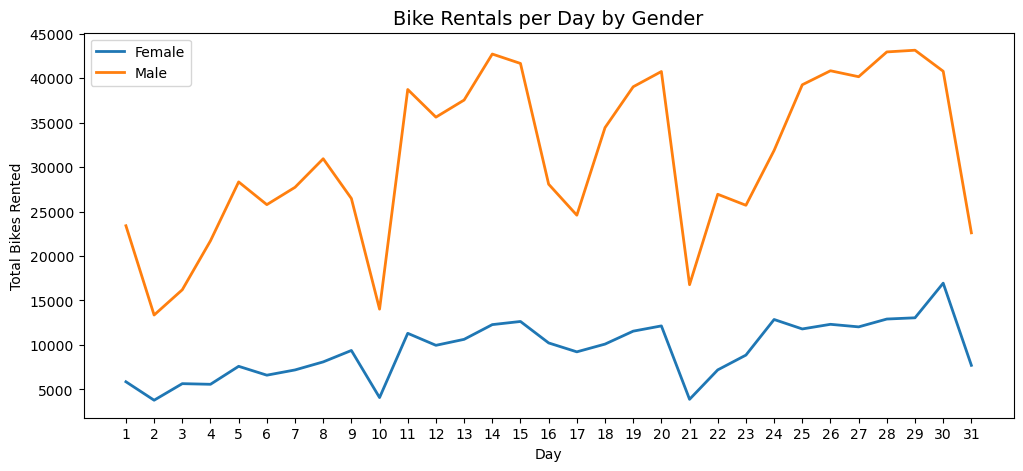

In [28]:
# Plot bike rentals per day by gender
df_citibike.pivot_table(values='trip_duration', index='start_day', columns='gender', aggfunc='count').plot(figsize=(12,5), linewidth=2)
plt.title('Bike Rentals per Day by Gender', fontsize=14)
plt.xlabel('Day')
plt.ylabel('Total Bikes Rented')
plt.xticks(np.arange(1,32))
plt.legend(prop={'size':10})
plt.tick_params(labelsize=10)

**Conclusion:**
- Male Citi Bike users rent bikes more frequently than female Citi Bike users.

### New questions based on visual exploration:
#### How does bike rental vary across each day? How does it compare to the average number of bike rentals?

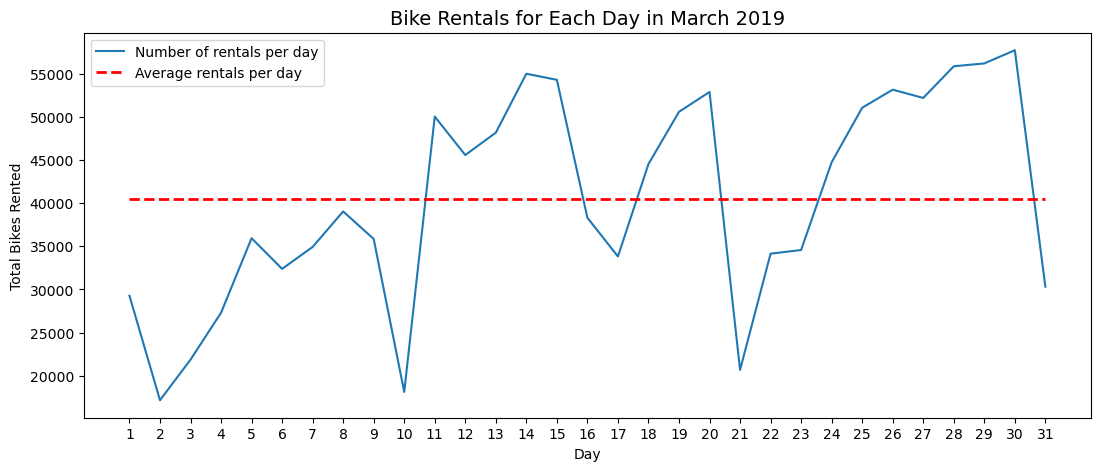

In [29]:
# Group data by start day and obtain mean number of bikes rented 
df = pd.DataFrame(df_citibike.groupby('start_day').size())
df['mean'] = df_citibike.groupby('start_day').size().mean()

# Plot total bikes rented for each day in March 2019
df_citibike.groupby('start_day').size().plot(figsize=(13,5), label='Number of rentals per day')
df['mean'].plot(color='red', linewidth=2, label='Average rentals per day', ls='--')
plt.title('Bike Rentals for Each Day in March 2019', fontsize=14)
plt.xlabel('Day')
plt.xticks(np.arange(1,32))
plt.ylabel('Total Bikes Rented')
plt.tick_params(labelsize=10)
plt.legend(prop={'size':10})

**Conclusion:**
- The number of bike rentals gradually increase for the first half of March and then fluctuates below and above the average number of bike rentals.
- The drops in number of bike rentals around certain dates were weekends.

**Defining a hypothesis:**
- Citi Bike users 50 years or younger have longer trip durations, on average, than Citi Bike users over 50 years.
- Citi Bike customer have longer trip durations, on average, than Citi Bike subscribers.
- Female Citi Bike users have longer trip durations, on average, than male Citi Bike users.